# Coding Assignment - 1
## MATH-GA 2805 Trends in Sell-Side Modelling
#### Abhishek Kulkarni (ask9103)
#### Lavaneesh Sharma (lss8875)

****

Consider a market where we have established at time $0$ (e.g., by looking at quoted CDS spreads) that the forward intensity curve for some company is given by 

$$\lambda_{f}(0, t) = a + b . t$$

for two positive constants $a$ and $b$.

## Question 1

Establish an analytical expression for the time $0$ survival probability $X(0,t)$, for any $t \geq 0$. \
Show your work.

#### Solution:

$$
\begin{align}
X(0,t) & = e^{-\int_{0}^t \lambda_{f}(0,u) du} \\
\\
\therefore \; X(0,T) & = e^{-\int_{0}^t (a+bu)du} \\
\\
\therefore \; X(0,t) & = e^{-(at+\frac{bt^{2}}{2})}
\end{align}
$$

****

The spot intensity process $\lambda(t) = \lambda_{f}(t, t)$ starts out at $\lambda(0) = a$. Assume that the dynamics of $\lambda(t)$ is given by a Gaussian process, as in Lecture Notes $4$, with constant mean reversion $\kappa$ and constant volatility $\sigma$.

## Question 2

Compute an analytical expression for the deterministic drift process $y(t)$ in Lecture Notes 4. Show your work.

#### Solution:

$$
\begin{align}
y(t) & = \int_{0}^t \sigma^{2}e^{2\kappa(u-t)} du \\ 
\\
& = \; \sigma^{2} \int_{0}^t e^{2\kappa(u-t)} du \\ 
\\
& = \sigma^{2} e^{-2 \kappa t} \frac{e^{2 \kappa u}}{2 \kappa} \Biggr|_{0}^{t} \\
\\
\therefore  y(t) & = \frac{\sigma^{2} (1 - e^{-2\kappa t})}{2\kappa}
\end{align}
$$

****

We now want to simulate the process for $\lambda(t)$ on a discrete time grid $\{t_{i}\}$ that spans the horizon $[0, 15]$ yrs. We also fix all our model constants to $a = 1.25\%, b = 0.175\%, \kappa = 3.5\%, \sigma = 1\% $.

## Question 3

Assume that the time grid has monthly spacing: $t_{0} = 0, \; t_{1} = 1/12, \; t_{2} = 2/12, \; ...$ etc. 

Document in detail the simulation algorithm you are using, and use it to draw $10$ independent paths of $\lambda(t)$ on the monthly grid, with each path ending after $15$ years. 

Graph these $10$ paths.

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
class Model_:
    def __init__(self,a,b,kappa,sigma,N,T,scale):
        self.a = a
        self.b = b
        self.kappa = kappa
        self.sig = sigma
        self.N = N  # Number of simulations
        self.T = T  # Time Period (in Yrs.)
        self.scale = scale # Intervals / Frequency in the time period
        self.X = np.zeros((self.N,self.T*self.scale))
        self.lamb = np.zeros((self.N,self.T*self.scale))
    
    def Y(self,t):
        return ((self.sig*self.sig)/(2*self.kappa))*(1 - np.exp(-2*self.kappa*t)) 
    
    def dW(self,dt):
        return norm.rvs(loc = 0,scale=np.sqrt(dt),size=(self.N,self.T*self.scale-1))
    
    def T_vec(self):    
        Tvec, dt = np.linspace(0, self.T, self.T*self.scale, retstep=True)
        return Tvec,dt
    
    def simulations(self):
        
        self.X[:,0]    = 0
        self.lamb[:,0] = self.a
        
        dt = self.T_vec()[1]
        W  = self.dW(dt)
        
        for i in range(0,self.T*self.scale-1):
            self.X[:,i+1] = self.X[:,i] + (self.Y(i/self.scale) - self.kappa * self.X[:,i]) * dt + self.sig * np.sqrt(dt) * W[:,i]
            self.lamb[:,i+1] = self.a + self.b * (i/self.scale) + self.X[:,i+1]
    
    def PlotX(self):
        plt.figure(figsize=(15,5))        
        for i in range(len(self.X)):
            plt.plot(self.T_vec()[0],self.X[i,:])
        plt.title("Paths for x")
        plt.xlabel("Time (t)")
        plt.ylabel("x(t)")
        plt.show()
        
    def Plotlambda(self):
        plt.figure(figsize=(15,5))        
        for i in range(len(self.lamb)):
            plt.plot(self.T_vec()[0],self.lamb[i,:])
        plt.title("Paths of \u03BB")
        plt.xlabel("Time (t)")
        plt.ylabel("\u03BB(t)")
        plt.show()

In [3]:
model1 = Model_(a = 0.0125,
                b = 0.00175,
                kappa = 0.035,
                sigma = 0.01,
                N = 10,
                T = 15,
                scale = 12) # No of months in 1yr

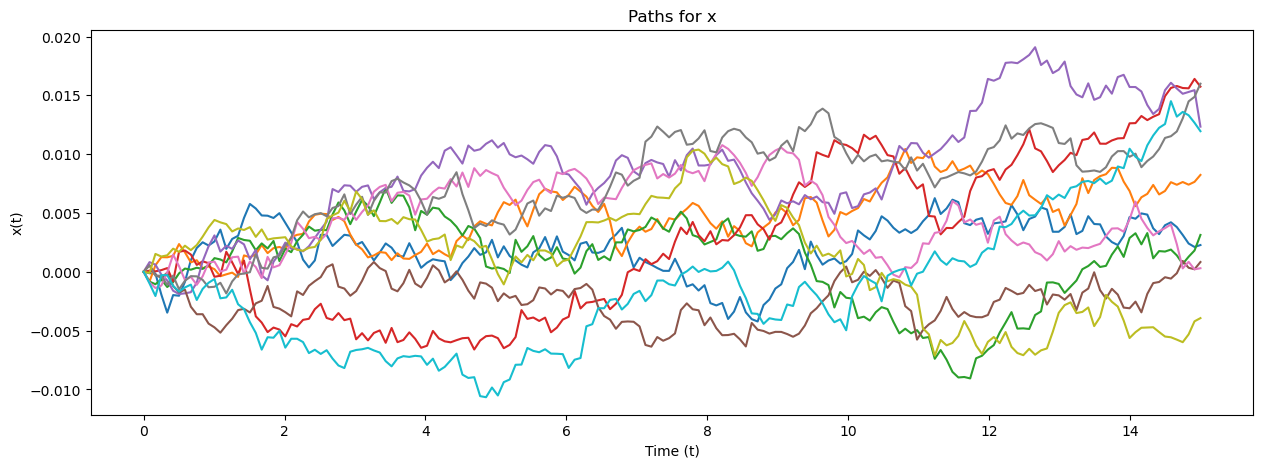

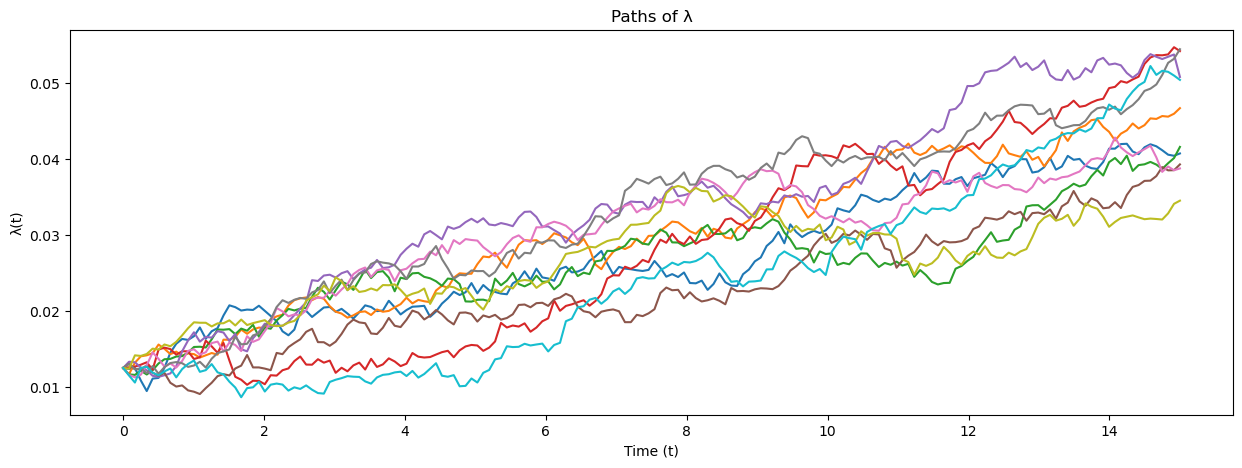

In [4]:
model1.simulations()
model1.PlotX()
model1.Plotlambda()

****

## Question 4

Repeat Question $3$, but now with weekly and daily paths (resulting in two new figures, each with $10$ random paths extending out to $15$ years).

#### Weekly Paths

In [5]:
model2 = Model_(a = 0.0125,
                b = 0.00175,
                kappa = 0.035,
                sigma = 0.01,
                N = 10,
                T = 15,
                scale = 52) # No of weeks in 1yr

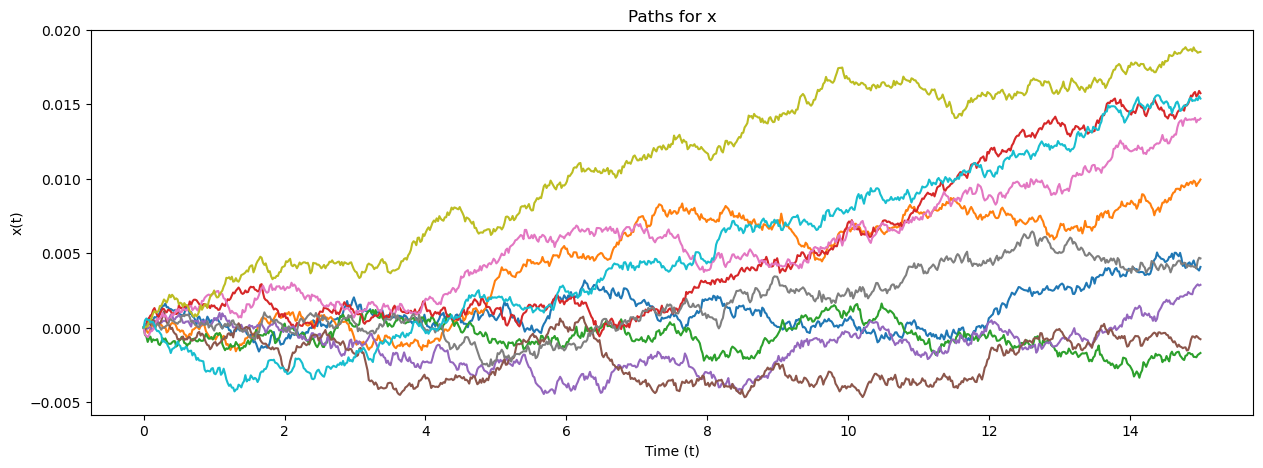

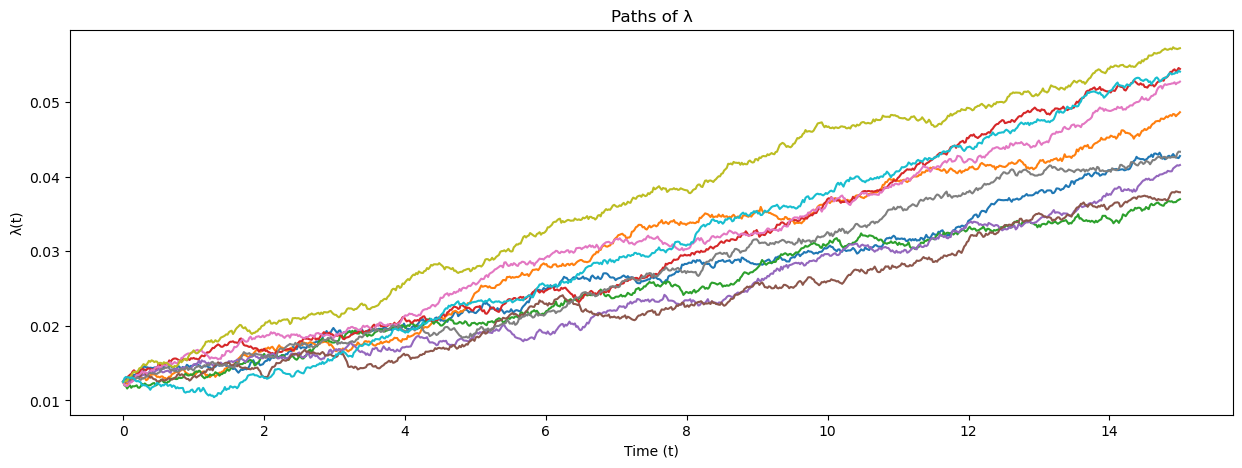

In [6]:
model2.simulations()
model2.PlotX()
model2.Plotlambda()

#### Daily Paths

In [7]:
model3 = Model_(a = 0.0125,
                b = 0.00175,
                kappa = 0.035,
                sigma = 0.01,
                N = 10,
                T = 15,
                scale = 365) # No of days in 1yr

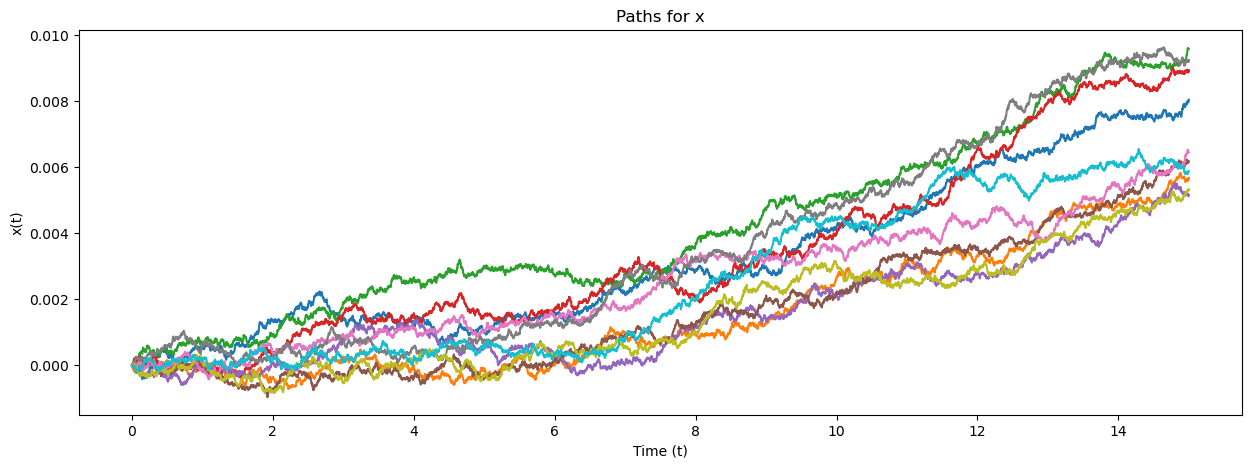

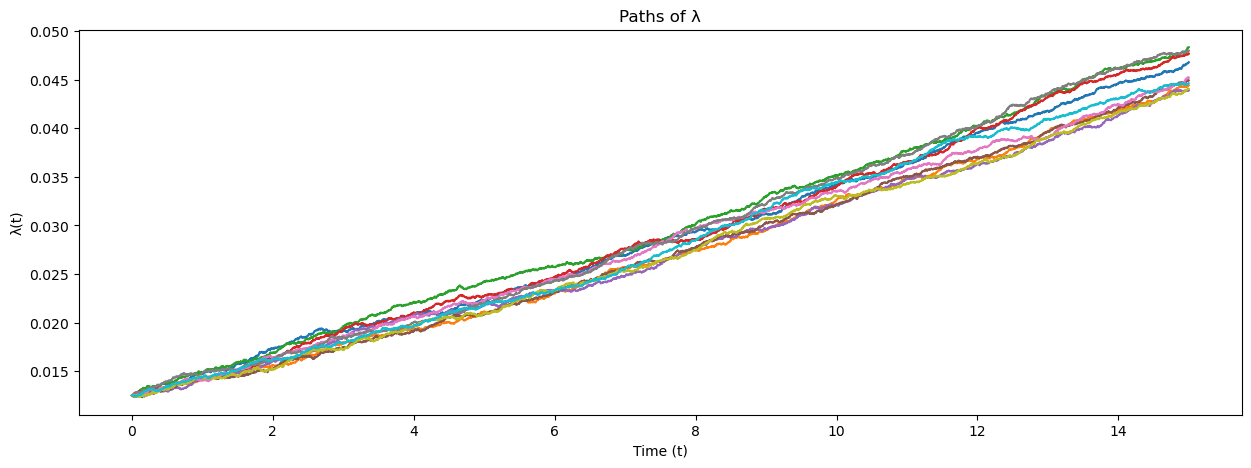

In [8]:
model3.simulations()
model3.PlotX()
model3.Plotlambda()

****

Whenever we do a random path of $\lambda(t)$, we can use a numerical integration rule (e.g., trapezoid rule) to approximate the integral -

$$I(T) = \int_{0}^{T} \lambda(u) du$$

for any $T$. If we do $M$ independent paths of $\lambda(t)$, we can construct $M$ independent realizations of $I(T)$. Let the $i^{th}$ realization be $I^{(i)}(T)$. Then we can approximate

$$X(0,T) = E\left( e^{-\int_{0}^{T}\lambda(u) du} \right) = E(e^{-I(T)}) \approx \frac{1}{M}\sum_{i=1}^{M}e^{-I^{(i)}(T)}$$

## Question 5

Using the daily grid to simulate $\lambda(t)$, use Monte Carlo simulation with $M = 50,000$ paths to estimate $X(0,T)$ for $T = 1,2,5,7,10,15$ years. 

For each estimate, also indicate the sample variance of the Monte Carlo estimate and establish a $3$-standard deviation confidence interval around the estimates. 

Is the model able to reproduce the values of $X(0,T)$ computed analytically in Question $1$? Discuss.

#### Trapezoid Rule of Integration:

The Trapezoid Rule fits a trapezoid into each subinterval and sums the areas of the trapezoid to approximate the total integral. This approximation for the integral to an arbitrary function is shown in the following figure. For each subinterval, the Trapezoid Rule computes the area of a trapezoid with corners at $(x_{i},0), (x_{i+1},0), (x_{i},f(x_{i})), (x_{i+1}, f(x_{i+1}))$ which is $h\frac{f(x_{i}) + f(x_{i+1})}{2}$

$$\int_{a}^{b} f(x) = \frac{h}{2} \sum_{i=0}^{n-1} (f(x_{i}) + f(x_{i+1}))$$

A computationally more efficient expression can be written as - 

$$\int_{a}^{b} f(x) dx \approx \frac{h}{2} \left( f(x_{0}) + 2 \left( \sum_{i=1}^{n-1}f(x_{i}) \right) + f(x_{n}) \right)$$

In [9]:
N = 50000
def trap_int(a,b,n,f_nparray):
    h = (b-a) / (n-1)
    return (h/2)*(f_nparray[:, [0]].reshape(1,N)[0] + \
                  2 * np.sum(f_nparray[:, 1:n-1], axis=1) + \
                  f_nparray[:, [n-1]].reshape(1,N))[0]

In [45]:
def simulated_survival_prob(tau):
    
    analytical_survival_probabilities = []
    asp_variance = []
    confidence_interval = []
    
    for i in range(len(tau)):
        temp_model = Model_(a = 0.0125,
                            b = 0.00175,
                            kappa = 0.035,
                            sigma = 0.01,
                            N = 50000,   # 50,000 paths for lambda
                            T = tau[i],
                            scale = 365) # No of days in 1yr
        
        temp_model.simulations()
        
        I = trap_int(0,temp_model.T,temp_model.T*temp_model.scale,temp_model.lamb)
        
        sampleX = np.exp(-1*I)
        
        print(f"Value of X(0,{tau[i]}) = {np.mean(sampleX)}")
        analytical_survival_probabilities.append(np.mean(sampleX))
        
        print(f"Variance for the value of X(0,{tau[i]}) = {np.var(sampleX)}")
        asp_variance.append(np.var(np.exp(-1*I)))
        
        print(f"3-S.D. Confidence Interval = ({np.mean(sampleX)-3*np.std(sampleX)},{np.mean(sampleX)+3*np.std(sampleX)})")
        confidence_interval.append((np.mean(sampleX)-3*np.std(sampleX),np.mean(sampleX)+3*np.std(sampleX)))
        
    return analytical_survival_probabilities, asp_variance, confidence_interval

In [26]:
T_ = np.array([1,2,5,7,10,15])

In [27]:
def theoretical_survival_prob(x, y, tau):
    return np.exp(-x*tau - (y*tau**2)/2)

We calculate the survival probabilites $X(0,T)$ using our analytical expression derived above as -

$$X(0,t) = e^{-(at+\frac{bt^{2}}{2})}$$

In [28]:
surv_prob_t = theoretical_survival_prob(x=0.0125, y=0.00175, tau=T_)
surv_prob_t

array([0.98671405, 0.97190229, 0.91908653, 0.87776621, 0.80856032,
       0.68087605])

In [46]:
surv_prob_s, surv_prob_s_var, surv_prob_s_CI = simulated_survival_prob(T_)
#surv_prob_s

Value of X(0,1) = 0.98670622947029
Variance for the value of X(0,1) = 8.586173249522141e-08
3-S.D. Confidence Interval = (0.9858271642892841,0.9875852946512959)
Value of X(0,2) = 0.9717896902214547
Variance for the value of X(0,2) = 6.525232358220442e-07
3-S.D. Confidence Interval = (0.96936632291079,0.9742130575321194)
Value of X(0,5) = 0.9174511633248513
Variance for the value of X(0,5) = 8.442193659788634e-06
3-S.D. Confidence Interval = (0.908734527337379,0.9261677993123236)
Value of X(0,7) = 0.8736323812747632
Variance for the value of X(0,7) = 2.0358213282107772e-05
3-S.D. Confidence Interval = (0.8600963582421671,0.8871684043073592)
Value of X(0,10) = 0.7982376021957662
Variance for the value of X(0,10) = 4.513770060532372e-05
3-S.D. Confidence Interval = (0.7780822231259518,0.8183929812655807)
Value of X(0,15) = 0.6552124412552558
Variance for the value of X(0,15) = 9.178316094295945e-05
3-S.D. Confidence Interval = (0.6264713826719914,0.6839534998385202)


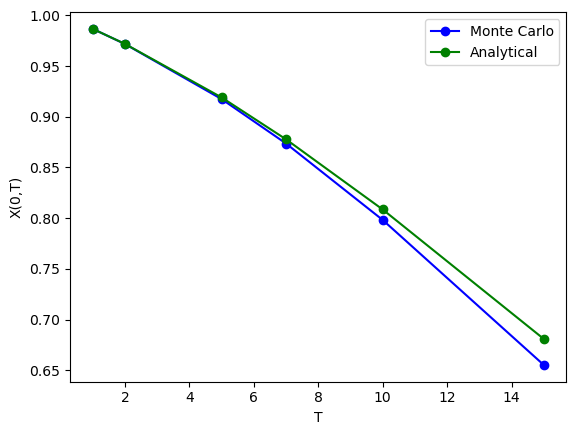

In [47]:
plt.plot(T_,surv_prob_s,'bo-',label = 'Monte Carlo') 
plt.plot(T_,surv_prob_t,'go-',label = 'Analytical')
plt.legend()
plt.xlabel('T')
plt.ylabel('X(0,T)')
plt.show()

**The results of the exercise can be summarised in the data frame below**

In [72]:
LCI = [surv_prob_s_CI[i][0] for i in range(len(surv_prob_s_CI))]
UCI = [surv_prob_s_CI[i][1] for i in range(len(surv_prob_s_CI))]

In [73]:
results = pd.DataFrame(np.array([surv_prob_t, surv_prob_s, surv_prob_s_var,LCI,UCI]).T, 
                       columns=["Analytical X(0,T)","Simulated X(0,T)","Variance of X(0,T)", "Mean - 3-S.D.","mean + 3-S.D."], 
                       index=["1Y","2Y","5Y","7Y","10Y","15Y"])
results

,"Analytical X(0,T)","Simulated X(0,T)","Variance of X(0,T)",Mean - 3-S.D.,mean + 3-S.D.
1Y,0.986714,0.986706,8.586173e-08,0.985827,0.987585
2Y,0.971902,0.971790,6.525232e-07,0.969366,0.974213
5Y,0.919087,0.917451,8.442194e-06,0.908735,0.926168
7Y,0.877766,0.873632,2.035821e-05,0.860096,0.887168
10Y,0.808560,0.798238,4.513770e-05,0.778082,0.818393
15Y,0.680876,0.655212,9.178316e-05,0.626471,0.683953


*****

### Bonus Question

$$ dx_{t} = (y_{t} - \kappa x_{t})dt + \sigma dW_{t}$$

<center> Let $X(t,x_{t}) = x_{t}e^{\kappa t}$ </center>

<center> Using Ito's lemma, we have </center>


$$dX = \frac{\partial X}{\partial t} dt + \frac{\partial X}{\partial x_{t}} dx_{t} + \frac{1}{2}\sigma^{2}\frac{\partial ^ {2} X}{\partial x ^ {2}}$$

$$\frac{\partial X}{\partial t} = \kappa x_{t}e^{\kappa t} \; \; \; \; \; \; \;  \frac{\partial X}{\partial x_{t}} = e^{\kappa t}$$

$$
\begin{align}
\therefore dX & = \kappa x_{t} e^{\kappa t}dt + e^{\kappa t}dx_{t} \\
& = \kappa x_{t} e^{\kappa t} dt + e^{\kappa t}((y_{t} - \kappa x_{t})dt + \sigma dW_{t}) \\
& = \kappa x_{t} e^{\kappa t} dt + e^{\kappa t}y_{t} - \kappa x_{t} e^{\kappa t} dt + \sigma e^{\kappa t}dW_{t} \\
\therefore dX & = e^{\kappa t}y_{t}dt + \sigma e^{\kappa t}dW_{t} \\
\therefore \int_{0}^{t} dX & = \int_{0}^{t} e^{\kappa t}(y_{t}dt + \sigma dW_{t}) \\
\therefore X(t) & = X(0)e^{\kappa t} + \int_{0}^{t}y_{s}e^{-\kappa s}ds + \sigma \int_{0}^{t}e^{-\kappa t}dW_{t}
\end{align}
$$

<center>For constant values of $\kappa$ & $\sigma$ it can be shown that, </center>

$$y_{s} = \frac{\sigma ^ {2} (1-e^{-2 \kappa s})}{2 \kappa} \; \; \&$$

$$X(t) \sim N \left( \frac{\sigma ^{2}e^{-2 \kappa t}(e^{\kappa t}-1)^{2}}{2 \kappa ^ {2}} , \frac{\sigma ^{2} (1-e^{-2 \kappa t})}{2 \kappa ^ {2}} \right)$$

At any given point of observation, $X(t)$ varies with instantnaeous $\mu$ and $\sigma^{2}$.

In order to find the mean and variance of $X(t)$ for an observation interval $[0,T]$ we can integrate the expressions for $\mu$ and $\sigma ^ {2}$ till time $T$. 

We now verify this result by simulating values of $X(0,T)$ using the expression - 

$$\mu + \sigma \times \sqrt{dt} \times Z$$

where $Z$ is a random number drawn from the standard normal distribution $N(0,1)$

**The simulation variance should be close to the one obtained from the analytical solution**

In [58]:
def m_v(t,kappa = 0.035,sigma = 0.01):
    return (0.5*(sigma/kappa)**2)*np.exp(-2*kappa*t)*(np.exp(-kappa*t)-1)**2 , ((sigma*sigma)/(2*kappa))*(1-np.exp(-2*kappa*t))

In [64]:
a     = 0.0125
b     = 0.00175
def path1(T,scale):
    MAT_T,DT = np.linspace(0, T, T*scale, retstep=True)
    res = np.zeros(len(MAT_T))
    for i in range(0,len(MAT_T)-1):
        mu,var = m_v(MAT_T[i])
        res[i+1] = res[i] + mu + np.sqrt(DT*var)*np.random.normal(loc = 0,scale = np.sqrt(1)) 
    return res

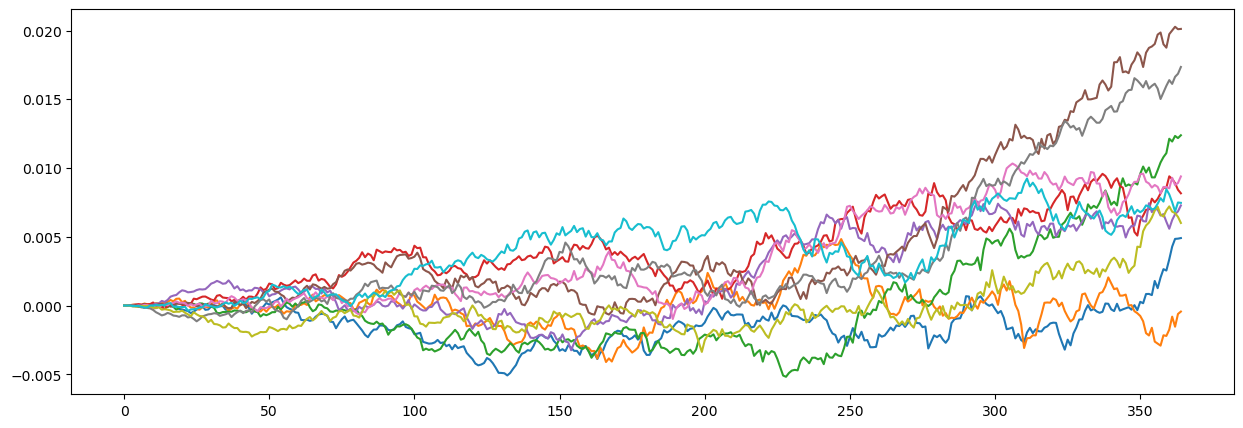

In [65]:
def X_VAR(nsims=10):
    xyzf = []
    for i in range(nsims):
        xyzf.append(path1(1,365))
    plt.figure(figsize=(15,5))
    for i in range(nsims):
        plt.plot(xyzf[i])
    plt.show()
    
X_VAR(10)

We can find the value of the integral using the function defined below -

In [63]:
def std_dev(T,scale,sims):
    xyzf = []
    meanvec = [0]*sims
    for i in range(sims):
        xyzf.append(path1(T,scale))
    for i in range(len(xyzf)):
        meanvec[i] = np.mean(xyzf[i])
    return np.std(meanvec)
std_dev(1,365,1000)

0.002853072487827962

In [61]:
def Analytical_std(sig,kappa,T):
    return ((sig)/(2*kappa))**2 *((2*sig*T + 1 - np.exp(-2*kappa*T)))

In [62]:
Analytical_std(0.01,0.035,1)

0.0017878812264092191

We see that the value for variance from our simulation and analytical formula are similar.